In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import json
%matplotlib inline

There are two leagues in Major League Baseball, the **American League** and the **National League**. Some people have the assumption that the AL has better starting pitching than the NL.

We can use *Wins Above Replacement* (shortened to WAR), a summary statistic for pitchers (and batters) in baseball, to assert whether this claim is true or not. The higher the WAR for a given pitcher, the better.

Below we'll load in a JSON file that has the WAR statistic for 455 pitchers in the AL and 425 pitchers in the NL.

In [2]:
with open('data/baseball_WARs.json', 'r') as fp:
    baseball_WARs = json.load(fp)

We can load in the JSON file into a dictionary that has two lists, named NL and AL. Each list contains all of the WAR values for all of the pitchers in either league in the 2019 season.

In [3]:
[print(i) for i in baseball_WARs]

AL
NL


[None, None]

1. Show the histograms and boxplots for each of the leagues. What do each of the distributions look like? Are there outliers? Can we assume each of the distributions is normal?

(array([  1.,  64., 271.,  64.,  35.,  10.,   2.,   3.,   1.,   4.]), array([-2.4 , -1.38, -0.36,  0.66,  1.68,  2.7 ,  3.72,  4.74,  5.76,
        6.78,  7.8 ]), <a list of 10 Patch objects>)


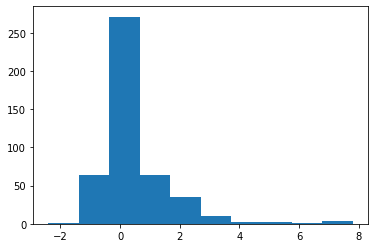

In [4]:
print(plt.hist(baseball_WARs['AL']))



(array([  4.,  74., 217.,  74.,  24.,  15.,   7.,   3.,   6.,   1.]), array([-2.3 , -1.34, -0.38,  0.58,  1.54,  2.5 ,  3.46,  4.42,  5.38,
        6.34,  7.3 ]), <a list of 10 Patch objects>)


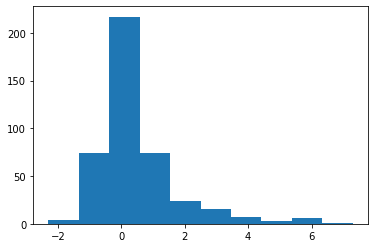

In [5]:
print(plt.hist(baseball_WARs['NL']))

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad24d6bf60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad24d7a6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad24d6bb70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad24d7ad30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad24d7ae10>],
 'means': []}

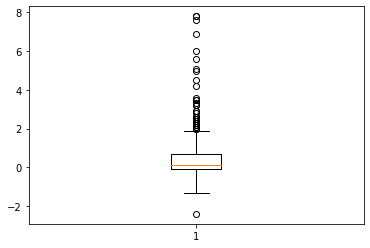

In [6]:
plt.boxplot(baseball_WARs['AL'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad24dd7d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad24de3470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad24dd7940>],
 'medians': [<matplotlib.lines.Line2D at 0x1ad24de3b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ad24de3e48>],
 'means': []}

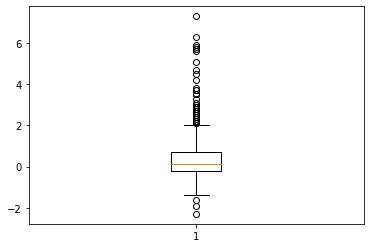

In [7]:
plt.boxplot(baseball_WARs['NL'])

2. Say that we want to first see if the average WAR in each of the leagues is the same, or are *different* from each other. In this case, what is our null hypothesis and our alternate hypothesis?

In [23]:
print(np.mean(baseball_WARs['AL']))
print(np.mean(baseball_WARs['NL']))
print("Null hypotheses: AL has better pitching than the NL")
print("Alternate hypotheses:  AL has same pitching as the NL")

0.47296703296703296
0.4595294117647059
Null hypotheses: AL has better pitching than the NL
Alternate hypotheses:  AL has same pitching as the NL


3. Using the pooled variance function below, find the pooled variance and pooled standard deviation of the two leagues.

In [9]:
def custom_pooled_variance(a, b):
    return ((((len(a) - 1) * np.var(a, ddof=1)) + ((len(b) - 1) * np.var(b, ddof=1))) / (len(a) + len(b) - 2)) * ((1/len(a)) + 1/len(b))

pool_var = custom_pooled_variance(baseball_WARs['AL'], baseball_WARs['NL'])
print("Var =",pool_var, "Std =", np.sqrt(pool_var))

Var = 0.006954559017696421 Std = 0.08339399869113137


4. Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [10]:
dist = stats.t(loc =0, scale = np.sqrt(pool_var), df = (len(baseball_WARs['AL'])+len(baseball_WARs['NL']) -2))


5. At a signifiance level of 0.05, what are the rejection regions of our distribution? Make a plot highlighting these rejection regions in red.

Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

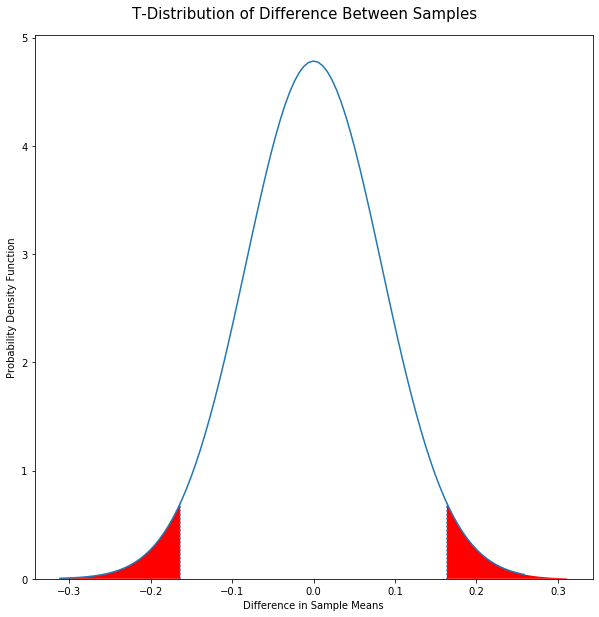

In [21]:

fig = plt.figure(figsize = (10,10))
x = np.linspace(dist.ppf(0.0001),dist.ppf(0.999),100)
plt.plot(x,dist.pdf(x))
plt.plot([dist.ppf(0.025),dist.ppf(0.025)],[0,dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001),dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill,0,Y,facecolor='red')

plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
#Fill in Region between 97.5th and 100h percentile here
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom = 0)
plt.xlabel("Difference in Sample Means")
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize = 15 , y= 0.92)




6. What is the mean difference in WAR between the two leagues (compute AL minus NL)?

In [59]:
mean = np.mean(baseball_WARs['AL']) - np.mean(baseball_WARs['NL'])
mean

0.013437621202327055

7. Given that we are doing a two-sided test, can we reject the null hypothesis here? What is the p-value of our observed difference?

In [19]:
print('p value:', (1 -dist.cdf(mean)))
print('Rejection Region: Less than', dist.ppf(0.025))
print('Rejection Region: More than', dist.ppf(0.975))
print("AL has better pitching than the NL")

p value: 0.4360124056368737
Rejection Region: Less than -0.163674862146467
Rejection Region: More than 0.16367486214646695
AL has better pitching than the NL


8. Given that the original assertion was that the AL has **better** pitching than the NL, state the new null and alternate hypotheses for this test.

In [26]:

print("Null hypotheses: NL has better pitching than the AL")


Null hypotheses: NL has better pitching than the AL


9. At a signifiance level of 0.05, what is the new rejection region of our distribution? Make a plot highlighting this rejection region in red.

Rejection Region: Less than -0.13731580527014753


Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

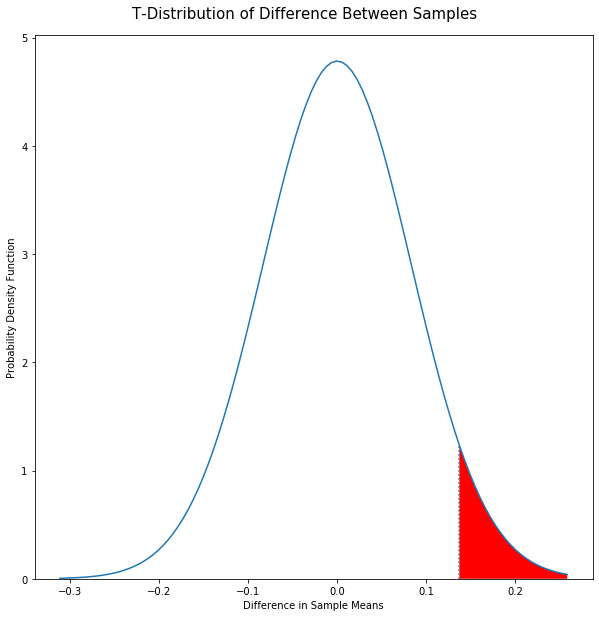

In [39]:
print('Rejection Region: Less than', dist.ppf(0.05))
fig = plt.figure(figsize = (10,10))
x = np.linspace(dist.ppf(0.0001),dist.ppf(0.999),100)
plt.plot(x,dist.pdf(x))
plt.plot([dist.ppf(0.95),dist.ppf(0.95)],[0,dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95),dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill,0,Y,facecolor='red')
plt.ylim(bottom = 0)
plt.xlabel("Difference in Sample Means")
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize = 15 , y= 0.92)




10. Given that we are doing a one-sided test, can we reject the null hypothesis here? What is the p-value of our observed difference?

In [40]:
mean = np.mean(baseball_WARs['NL']) - np.mean(baseball_WARs['AL'])
mean
print(dist.cdf(mean))
print("No, we can not reject null hypothesis here because NL has better pitching than the AL")


0.4360124056368738
No, we can not reject null hypothesis here because NL has better pitching than the AL


11. As you (hopefully) observed, the underlying distributions are skewed, which means that they technically violate the underlying assumption of normality for a two-sided T-test.

To address this, do a bootstrap test with 10,000 samples using the method we did in class. Use a random seed of 42 and graph the results (again, compute AL minus NL)

Text(0.5, 0.92, 'Bootstrap Distribution of Difference Between Samples')

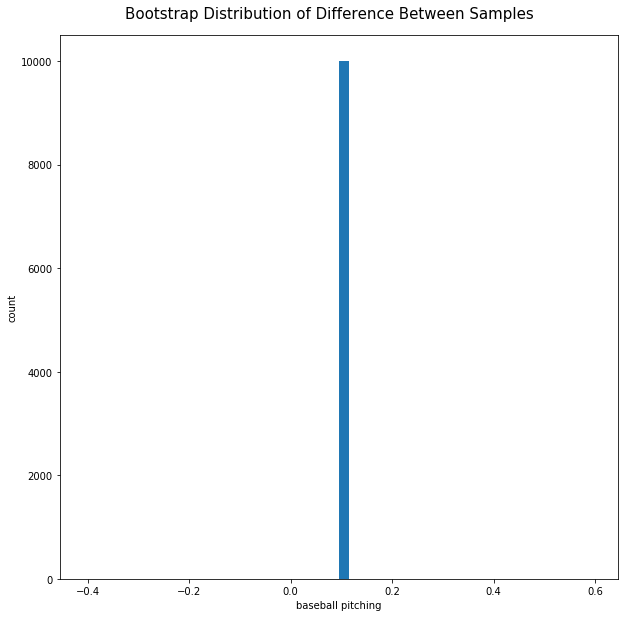

In [65]:
diff =[]
for i in range(10000):
    total = baseball_WARs['AL'] + baseball_WARs['NL']
    np.random.seed(42)
    np.random.shuffle(total)
    AL = total[:(len(baseball_WARs['AL']))]
    NL = total[(len(baseball_WARs['NL'])):]
    diff.append(np.mean(AL) - np.mean(NL))
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('baseball pitching')
plt.ylabel('count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)


12. For a one-sided test at a signifiance level of 0.05, calculate the rejection region of this distribution.

In [68]:
print(np.percentile(diff, 5))

print("reject null hypothesis if the value is less than", mean)
np.array(diff)[np.array(diff) <= mean  ]

0.09450549450549456
reject null hypothesis if the value is less than 0.013437621202327055


array([], dtype=float64)

13. What is the p-value of our observed difference?

In [69]:

stats.percentileofscore(diff, dist.cdf(mean))

100.0

BONUS: Say that someone claims to have found a long-lost work by Shakespeare. We want to try and verify if this work is by Shakespeare by comparing the frequency of common words to see if the relative frequencies are similar to what Shakespeare would have written.

|Word |  a |an | this  | that |
|---|---|---| --- | --- |
|King Lear   |  150|  30 | 30 | 90
| Lost Work  |  90 |  20 | 10 | 80

14. Run a Chi-Squared contingency test on this data to see if these two works could conceivably come from the same distribution. Can we reject the null hypothesis at a significance level of 0.05?

In [82]:
OV = [150,30,30,90]
ONV = [90,20,10,80]
total = [OV[i] + ONV[i] for i in range (len(OV))]
exp_rate = [total[i] / (np.sum(OV) + np.sum(ONV) ) for i in range (len(OV))]
df = pd.DataFrame()
df['OV'] = OV
df['ONV'] = ONV
df['TOTAL'] = total
df['expected rate'] = exp_rate
df['EV'] = df['expected rate'] * df['OV'].sum()
df['ENV'] = df['expected rate'] * df['ONV'].sum()
df

,OV,ONV,TOTAL,expected rate,EV,ENV
0,150,90,240,0.48,144.0,96.0
1,30,20,50,0.10,30.0,20.0
2,30,10,40,0.08,24.0,16.0
3,90,80,170,0.34,102.0,68.0


In [83]:
df_all = pd.DataFrame()
df_all['observed_value'] = np.hstack([df['OV'], df['ONV']])
df_all['expected_value'] = np.hstack([df['EV'], df['ENV']])
df_all['diff'] = np.power(df_all['observed_value'] - df_all['expected_value'], 2)
df_all['diff_over_expected']= df_all['diff'] / df_all['expected_value']
print('Chi-Square Statistic:', df_all['diff_over_expected'].sum())

df_all

Chi-Square Statistic: 7.904411764705885


,observed_value,expected_value,diff,diff_over_expected
0,150,144.0,36.0,0.250000
1,30,30.0,0.0,0.000000
2,30,24.0,36.0,1.500000
3,90,102.0,144.0,1.411765
4,90,96.0,36.0,0.375000
5,20,20.0,0.0,0.000000
6,10,16.0,36.0,2.250000
7,80,68.0,144.0,2.117647


15. How many degrees of freedom are there in the Chi-Squared distribution?

In [89]:
print("Null hypothesis: frequency of common words are are similar to what Shakespeare would have written")
print("(n - 1)*(m - 1) = ", (2-1) * (4-1))


Null hypothesis: frequency of common words are are similar to what Shakespeare would have written
(n - 1)*(m - 1) =  3


16. Given the number of degrees of freedom, at what level can we reject the n ull hypothesis?

In [90]:
dist = stats.chi(df = 3)
print("Rejection Region: Greater than", dist.ppf(0.95), 3)

Rejection Region: Greater than 2.7954834829151074 3
